<a href="https://colab.research.google.com/github/PaulAyeni/NYC_Airbnb_DS_project/blob/main/Airbnb_Price_Modelling_A_Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iterative Feature Engineering for Airbnb Price Prediction

## 1. Problem Statement
The goal of this project is to predict the price of Airbnb listings based on key features such as location, room type, availability, and reviews. By building a machine learning model, i aim to:
- Understand which features drive Airbnb prices.
- Improve model accuracy iteratively through feature engineering.
- Provide actionable insights for optimising pricing strategies.

This project uses an iterative process of feature engineering and analysis to refine the model's performance, with a particular focus on leveraging feature importance to guide enhancements.

---

## 2. Dataset Description
The dataset contains information about Airbnb listings in New York City, including:
- **neighbourhood_group**: High-level boroughs like Manhattan, Brooklyn, etc.
- **neighbourhood**: Specific areas within boroughs.
- **room_type**: Type of accommodation (Entire home/apt, Private room, etc.).
- **price**: Listing price (target variable).
- **minimum_nights**: Minimum stay duration required by the host.
- **number_of_reviews**: Total reviews for the listing.
- **availability_365**: Number of available days per year.

### Key Highlights:
- The dataset includes both numerical and categorical variables.
- It is publicly available and suitable for predictive modeling tasks.
- Outliers, missing values, and skewed distributions in features like `price` and `availability_365` require careful preprocessing.

---

### 3. Approach Overview
This notebook follows these steps:
1. Data Preprocessing
2. Exploratory Data Analysis (EDA)
3. Baseline Model Development
4. Iterative Feature Engineering (Guided by Feature Importance)
5. Final Model Evaluation and Insights


# 1. Data preprocessing

In [ ]:
#getting the data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#READING THE DATA
df = pd.read_csv('/content/drive/MyDrive/AB_NYC_2019.csv')

In [ ]:
#seeing the data
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#checking the shape of the data
df.shape

(48895, 16)

In [ ]:
#checking the data type
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


In [ ]:
#checking if there are any id duplicates
df.duplicated(subset = 'id').sum()

0

In [ ]:
#dropping any unwated columns
df = df.drop(columns = ['id',	'name',	'host_id',	'host_name', 'latitude',	'longitude', ], axis = 1)

In [ ]:
#seeing the data post dropping the columns
df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#checking for missing values
df.isnull().sum()

,0
neighbourhood_group,0
neighbourhood,0
room_type,0
price,0
minimum_nights,0
number_of_reviews,0
last_review,10052
reviews_per_month,10052
calculated_host_listings_count,0
availability_365,0


### Identifying Missing Data

The dataset contains missing values in the following columns:
- **`last_review`**: 10,052 missing entries.
- **`reviews_per_month`**: 10,052 missing entries.

#### Hypothesis:
- Properties with missing `last_review` might not have been reviewed yet.
- Missing `reviews_per_month` could be directly tied to missing `last_review` values.

#### Next Steps:
1. Investigate the relationship between:
   - Missing `last_review` values and `number_of_reviews`.
   
2. Consider appropriate strategies for handling missing data:
   - this could mean dropping a column
   


In [ ]:
#Viewing the rows that are null
df[df[['last_review', 'reviews_per_month']].isnull().any(axis=1)]

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
19,Manhattan,East Harlem,Entire home/apt,190,7,0,NaN,NaN,2,249
26,Manhattan,Inwood,Private room,80,4,0,NaN,NaN,1,0
36,Brooklyn,Bedford-Stuyvesant,Private room,35,60,0,NaN,NaN,1,365
38,Brooklyn,Flatbush,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,NaN,NaN,2,9
48891,Brooklyn,Bushwick,Private room,40,4,0,NaN,NaN,2,36
48892,Manhattan,Harlem,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,NaN,NaN,6,2


### Observing Missing Data
- Missing values in `last_review` and `reviews_per_month` correspond to properties with `number_of_reviews = 0`.
- This confirms my hypothesis about the relationship between these columns.


In [ ]:
#dropping last reviews
df = df.drop(columns=['last_review'], axis=1)

In [ ]:
#seeing what the data looks like now
df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


In [ ]:
#filling the misssing values
df.fillna(0, inplace = True)

In [ ]:
#checking if missing values have gone
df.isnull().sum()

,0
neighbourhood_group,0
neighbourhood,0
room_type,0
price,0
minimum_nights,0
number_of_reviews,0
reviews_per_month,0
calculated_host_listings_count,0
availability_365,0


## **Recap**: **Data Preprocessing**

During the data preprocessing phase, the following steps were performed to prepare the dataset for analysis and modeling:

### 1. Initial Data Inspection
- The dataset was loaded and inspected using `.head()`, `.shape`, and `.dtypes`.
- The dataset contains **48,895 rows** and **16 columns** with mixed data types (e.g., integers, floats, objects).

---

### 2. Duplicate Removal
- Checked for duplicate entries in the `id` column using `.duplicated()`.
- **No duplicate rows** were found.

---

### 3. Unnecessary Column Removal
The following columns were not needed for the analysis and were removed:
- `id` and `name`: Identifiers and descriptions not needed for modeling.
- `host_id` and `host_name`: Host-level details not relevant for this analysis.
- `latitude` and `longitude`: Geographical location data excluded for simplicity.

---

### 4. Missing Data Handling
#### Missing Columns:
- **`last_review`**: 10,052 missing entries.
- **`reviews_per_month`**: 10,052 missing entries.

#### Hypothesis:
- Missing values in these columns correspond to properties with `number_of_reviews = 0`.

#### Steps Taken:
1. Verified the hypothesis:
   - Filtered rows with missing values in `last_review` and `reviews_per_month`.
   - Observed that all such rows had `number_of_reviews = 0`.
2. Actions:
   - Dropped the `last_review` column as it was not essential for the analysis.
   - Filled missing values in `reviews_per_month` with `0`, indicating no reviews.

---

### 5. Final Check
- Rechecked for missing values using `.isnull().sum()`.
- **No missing values** remain in the dataset.

---

### Outcome:
- The dataset now contains **48,895 rows** and **10 columns** after preprocessing.
- All missing values have been handled, ensuring consistency for further analysis.


# **Exploratory Data Analysis (EDA)**

With the dataset cleaned and preprocessed, the next step is to perform **Exploratory Data Analysis** to uncover patterns, relationships, and potential insights. This phase will focus on:
1. Understanding the distribution of key features (e.g., `price`, `minimum_nights`).
2. Identifying relationships between features (e.g., `neighbourhood_group` and `price`).
3. Highlighting potential outliers or anomalies.

---

### Steps for EDA:
- **Univariate Analysis**: Analyse the distribution of individual features.
- **Bivariate Analysis**: Explore relationships between features.
- **Outlier Detection**: Identify and handle potential outliers.


In [ ]:
#check if the categorical variables have appropriate number of levels
df_cat = df[['neighbourhood_group', 'neighbourhood',	'room_type']]
df_cat.nunique()

,0
neighbourhood_group,5
neighbourhood,221
room_type,3


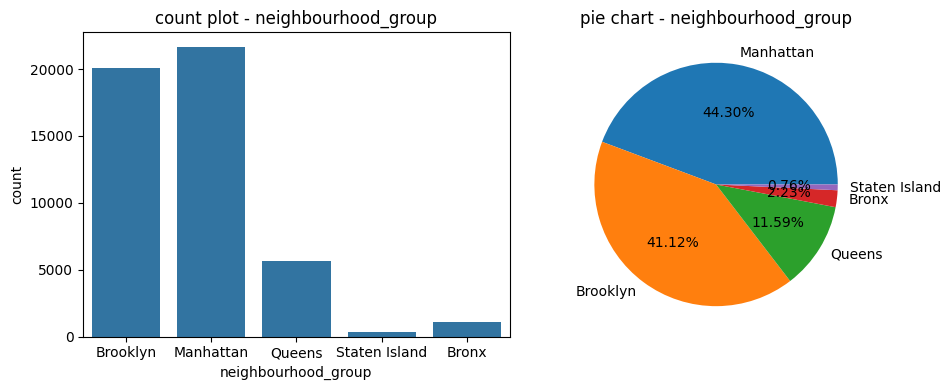

In [ ]:
#Ananlysing the categorical data

variable = 'neighbourhood_group'

plt.figure(figsize = (10, 4))
#count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'count plot - {variable}')

#pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels =counts.index, autopct='%0.2f%%')
plt.title(f'pie chart - {variable}')

#Adjust layout
plt.tight_layout()

#show plots
plt.show()

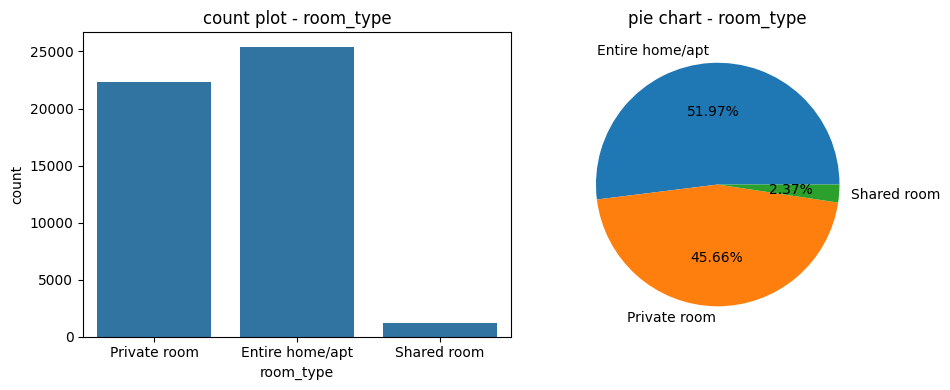

In [ ]:
#Ananlysing the categorical data

variable = 'room_type'

plt.figure(figsize = (10, 4))
#count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat)
plt.title(f'count plot - {variable}')

#pie chart
plt.subplot(1, 2, 2)
counts = df_cat[variable].value_counts()
plt.pie(counts, labels =counts.index, autopct='%0.2f%%')
plt.title(f'pie chart - {variable}')

#Adjust layout
plt.tight_layout()

#show plots
plt.show()

In [ ]:
#separting the number columns and seeing if it has done so
number_col = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
number_col

['price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [ ]:
#separting the number columns and seeing if it has done so
number_col = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
number_col

['price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

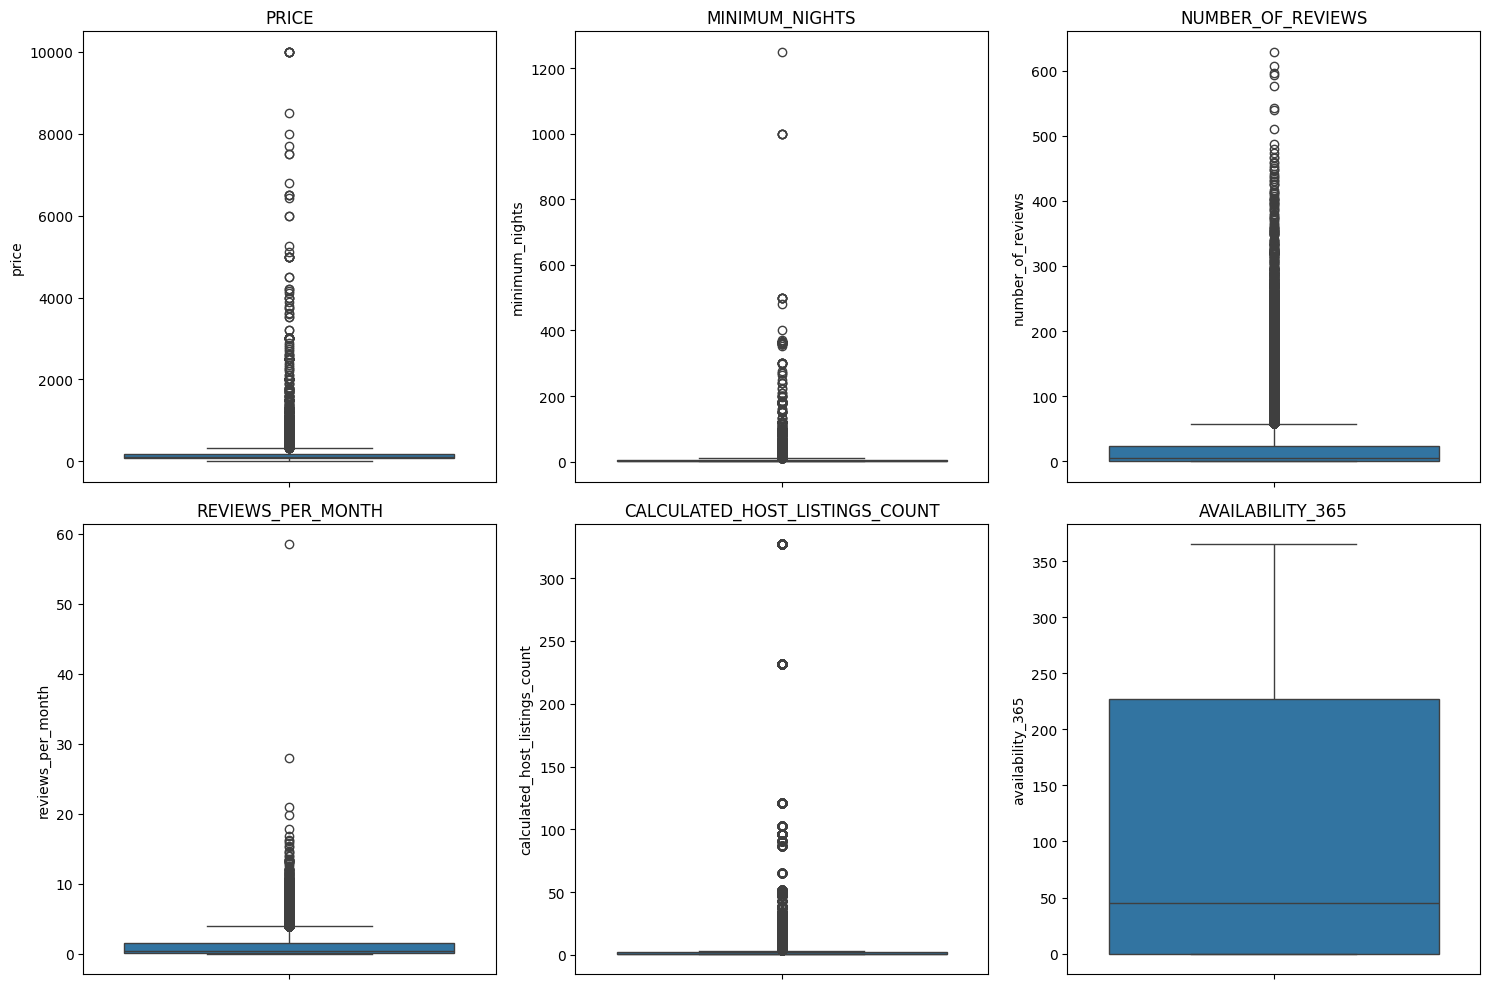

In [ ]:
#presence of outliers

# Set up the figure size and layout
plt.figure(figsize=(15, 10))

# Loop through the columns and create subplots
for i in range(len(number_col)):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=number_col[i], data=df)
    plt.title(number_col[i].upper())
    plt.tight_layout()

# Show all plots together
plt.show()

In [ ]:
#seeing the summary stats of the data
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Recap: Univariate Analysis and Outlier Detection

### **Univariate Analysis**
#### **Categorical Variables**:
1. Conducted analysis on `neighbourhood_group` and `room_type`.
   - **Key Findings**:
     - **`neighbourhood_group`**:
       - Manhattan and Brooklyn dominate the listings, accounting for **44.3%** and **41.1%**, respectively.
       - Staten Island and Bronx contribute the least, with less than **5%** combined.
     - **`room_type`**:
       - Entire home/apartment constitutes the majority (**51.97%**), followed by private rooms (**45.66%**), with shared rooms being the least common (**2.37%**).

#### **Numerical Variables**:
1. Analysed descriptive statistics for numerical variables, focusing on `price` (the target variable).
   - **Mean Price**: 152.72, with a high standard deviation  of  240.15, indicating variability in listings.
   - **Median Price**: $106, showing positive skewness in the price distribution.

---

### **Outlier Detection**
1. Boxplots for numerical variables revealed significant outliers in:
   - **`price`**: Listings price had a min of 0 to 1000 ($)
   - **`minimum_nights`**: Extremely high values (e.g., 1250 nights) were observed.
   - **`number_of_reviews`** and **`reviews_per_month`**: Skewed distributions with extreme values.

2. **Handling Outliers**:
   - As XGBoost is robust to outliers, no outlier removal was performed to the predictors to preserve the integrity of the data.

---

### **Outcome**
- **Target Variable (`price`)**:
  - keeping 95% of the data and removing the extreme outliers ( this will be done at the feature engirneering stage)
-  **Predictors**:
  - Retained outliers for now as XGBoost can handle them efficiently.



### Start of bivarite analysis


Text(0.5, 1.05, 'Where is the most expensive boroughs?')

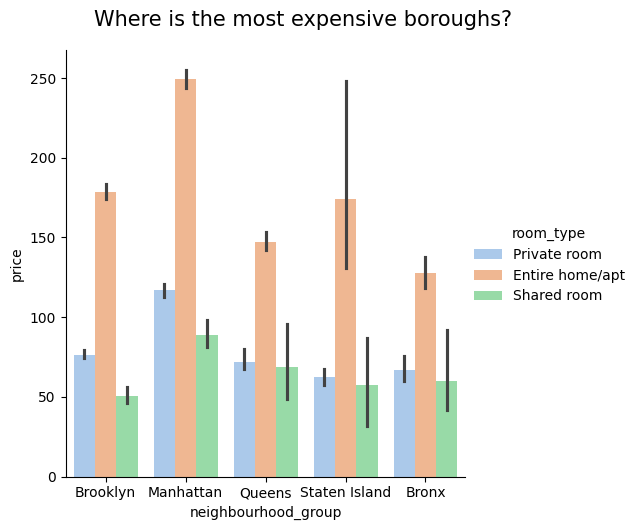

In [ ]:
# Price according to different room_type in different areas
fig = sns.catplot(
    x='neighbourhood_group',
    y='price',
    data=df,
    kind='bar',
    hue='room_type',
    palette='pastel')

#Add title and adjust its position
fig.fig.suptitle(
    'Where is the most expensive boroughs?',
    fontsize=15,
    y=1.05)


<Figure size 1200x800 with 0 Axes>

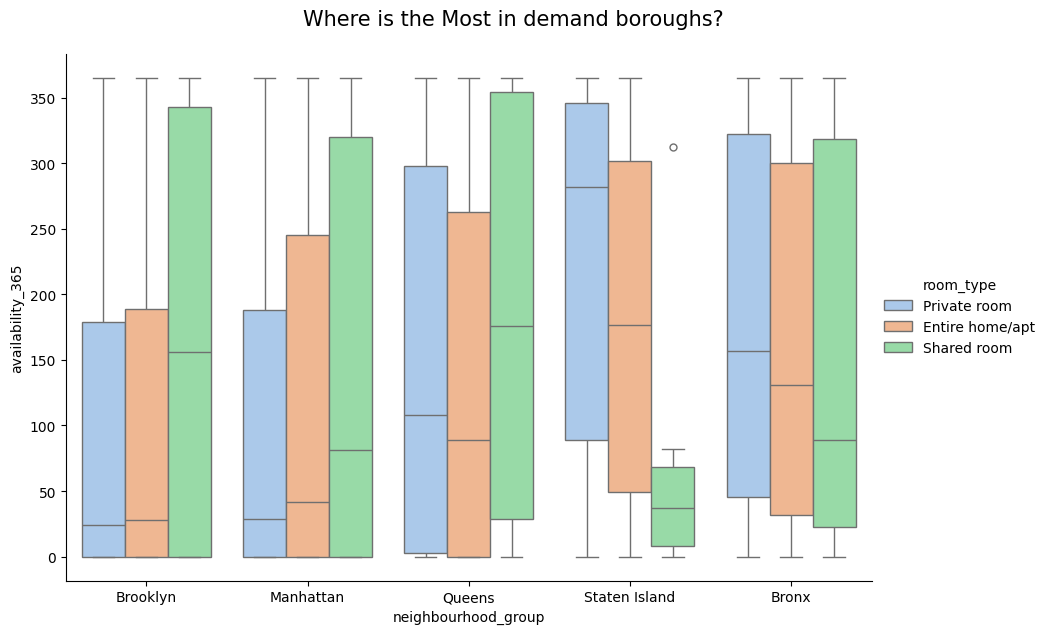

In [ ]:
# Increase the figure size
plt.figure(figsize=(12, 8))

# Plot avaibility by room type across different neighborhood groups
fig2 = sns.catplot(
    x='neighbourhood_group',
    y='availability_365',
    kind='box',
    hue='room_type',
    data=df,
    palette='pastel',
    height=6,
    aspect=1.5
)



# Add title and adjust its position
fig2.fig.suptitle(
    'Where is the Most in demand boroughs?',
    fontsize=15,
    y=1.05
)

# Display the plot
plt.show()

In [ ]:
# Group by borough and neighborhood, count the occurrences
top_neighborhoods = (
    df.groupby(['neighbourhood_group', 'neighbourhood'])['neighbourhood']
    .count()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
    .head(10)
)

# Display the top 10 neighborhoods across all boroughs
print(top_neighborhoods)

    neighbourhood_group       neighbourhood  count
93             Brooklyn        Williamsburg   3920
50             Brooklyn  Bedford-Stuyvesant   3714
105           Manhattan              Harlem   2658
58             Brooklyn            Bushwick   2465
124           Manhattan     Upper West Side   1971
106           Manhattan      Hell's Kitchen   1958
100           Manhattan        East Village   1853
123           Manhattan     Upper East Side   1798
65             Brooklyn       Crown Heights   1564
112           Manhattan             Midtown   1545


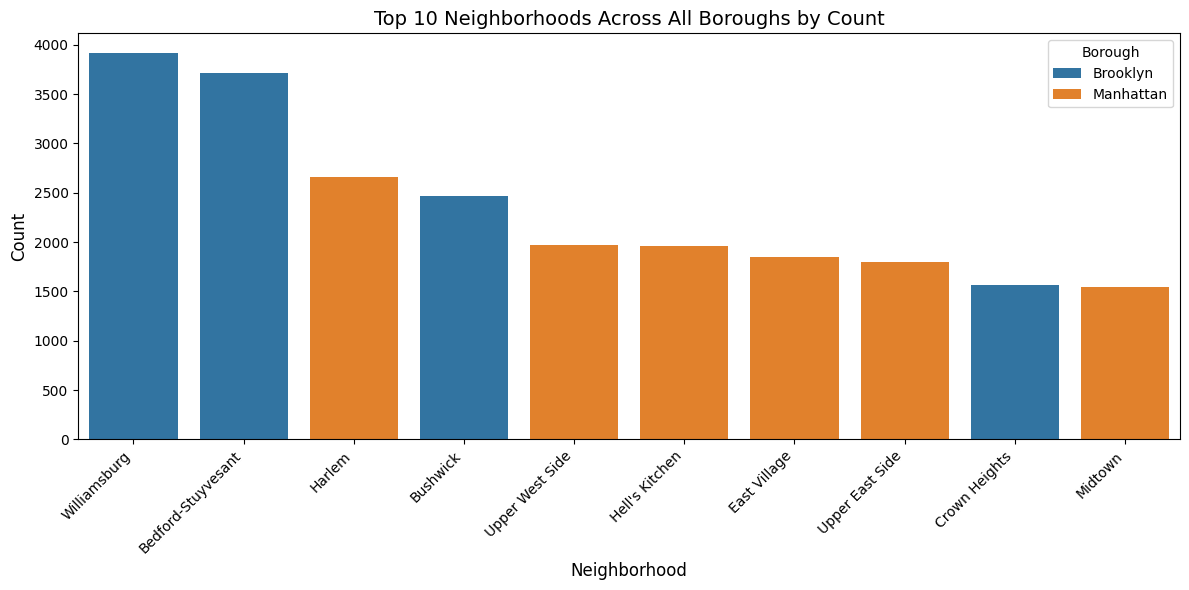

In [ ]:
# Create a count plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_neighborhoods, x='neighbourhood', y='count', hue='neighbourhood_group', dodge=False)

#Adding chart features
plt.title('Top 10 Neighborhoods Across All Boroughs by Count', fontsize=14)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Borough', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Group by neighbourhood_group and neighbourhood, calculate average price
average_price_stats = (
    df.groupby(['neighbourhood_group', 'neighbourhood'])['price']
    .mean()
    .reset_index(name='average_price')
    .sort_values('average_price', ascending=False)
)

# Select top 10 neighborhoods by average price
top_avg_price = average_price_stats.head(10)


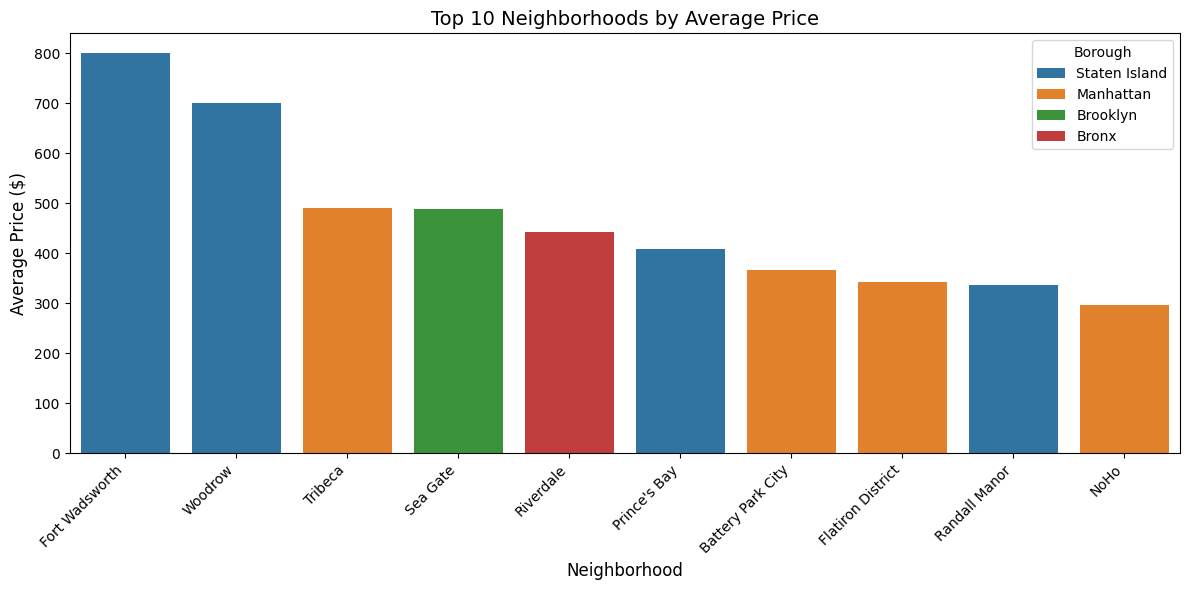

In [ ]:
# Plot for Average Price
plt.figure(figsize=(12, 6))
sns.barplot(data=top_avg_price, x='neighbourhood', y='average_price', hue='neighbourhood_group', dodge=False)

#Adding chart features
plt.title('Top 10 Neighborhoods by Average Price', fontsize=14)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Borough', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

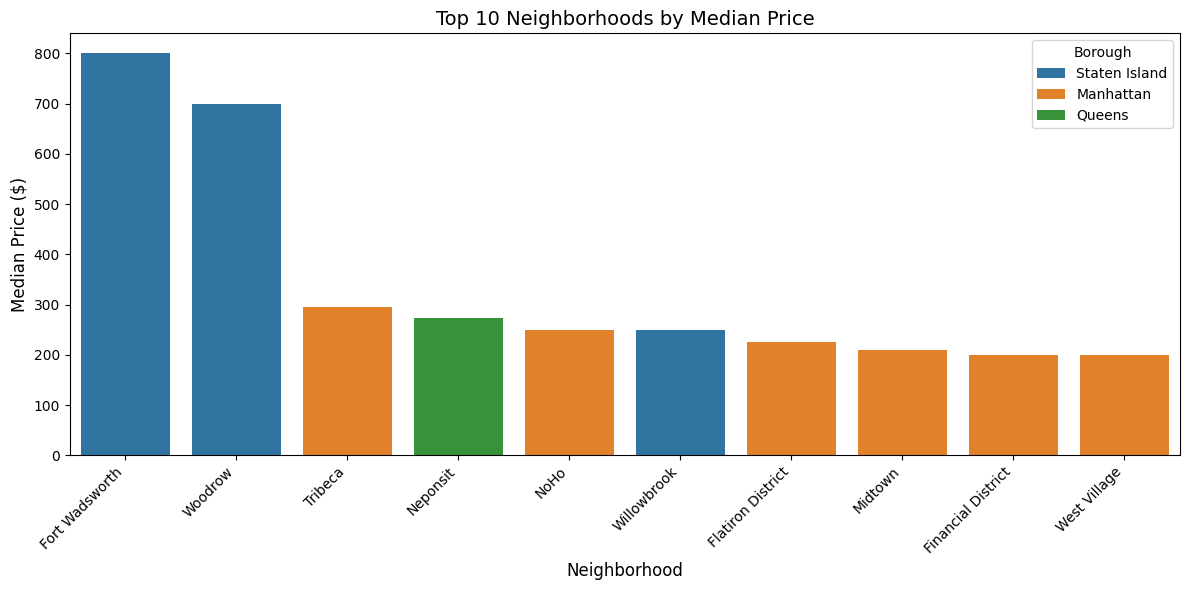

In [ ]:
# Group by neighbourhood_group and neighbourhood, calculate median price
median_price_stats = (
    df.groupby(['neighbourhood_group', 'neighbourhood'])['price']
    .median()
    .reset_index(name='median_price')
    .sort_values('median_price', ascending=False)
)

# Select top 10 neighborhoods by median price
top_median_price = median_price_stats.head(10)

# Plot for Median Price
plt.figure(figsize=(12, 6))
sns.barplot(data=top_median_price, x='neighbourhood', y='median_price', hue='neighbourhood_group', dodge=False)

# Enhance the plot
plt.title('Top 10 Neighborhoods by Median Price', fontsize=14)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Median Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Borough', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

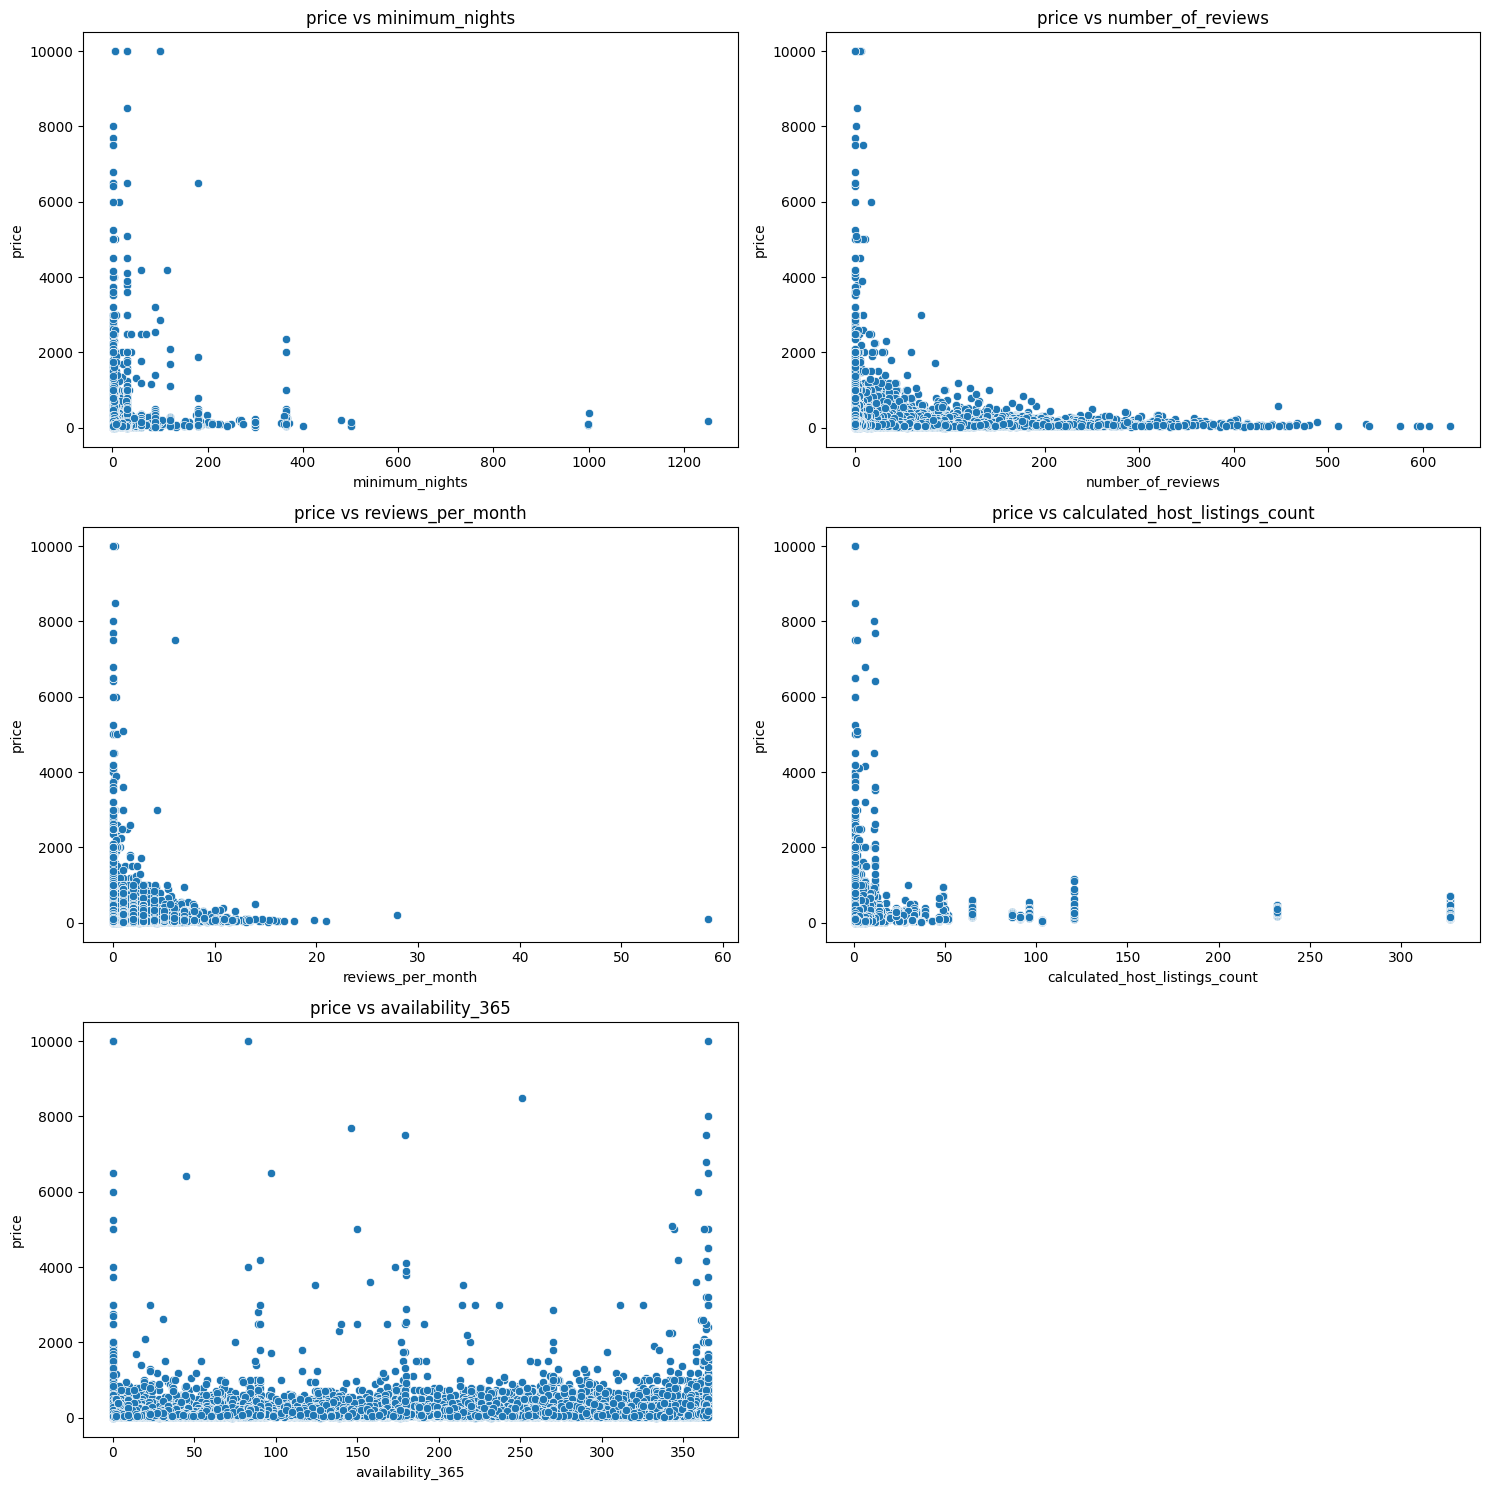

In [ ]:
def plot_price_with_columns(df, target, columns):
    """
    Ploting a scatter plots between the target column (price) and a list of numerical columns.

    """
    # Remove the target column from the columns list if it's included
    columns = [col for col in columns if col != target]

    # Set up the figure
    num_plots = len(columns)
    cols = 2  # Number of columns in the grid
    rows = (num_plots + 1) // cols  # Calculate rows needed

    plt.figure(figsize=(15, 5 * rows))

    # Loop through each column and create a scatter plot
    for i, col in enumerate(columns):
        plt.subplot(rows, cols, i + 1)
        sns.scatterplot(data=df, x=col, y=target)
        plt.title(f'{target} vs {col}')
        plt.xlabel(col)
        plt.ylabel(target)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

# Using price with the number_col list
plot_price_with_columns(df, target='price', columns=number_col)


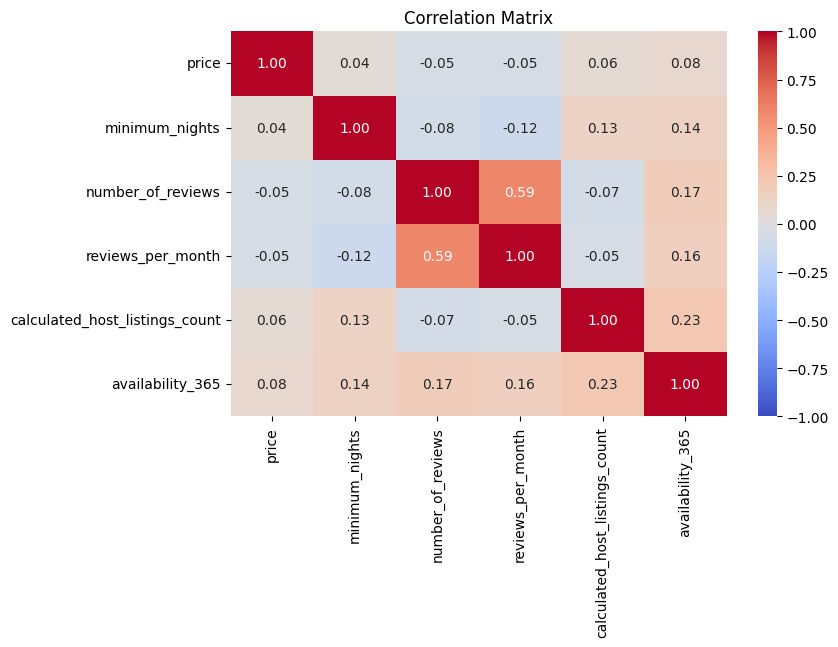

In [ ]:
#making a correlation matrix
correlation_matrix = df[number_col].corr()

#visualising the correlation matrix using a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### Key Insights from Bivariate Analysis

1. **Neighbourhood and Room Type Impact on Price**:
   - Manhattan commands the highest prices, particularly for entire homes/apartments.
   - Staten Island and Bronx are the most budget-friendly options.

2. **Weak or No Correlation with Numerical Variables**:
   - Price shows weak relationships with numerical variables like `availability_365` and `calculated_host_listings_count`.
   - Categorical features (`neighbourhood_group`, `room_type`) are stronger predictors of price.

3. **Outliers and Trends**:
   - Outliers in price and predictors do not obscure trends due to XGBoost’s robustness.
   - Demand indicators (e.g., availability, host listings) do not consistently correlate with higher prices.

4. **Neighbourhood-Level Highlights**:
   - Most listings are in Williamsburg and Bedford-Stuyvesant (Brooklyn).
   - Staten Island’s Fort Wadsworth and Woodrow lead in average and median prices, indicating unique pricing dynamics.

---

## Next Steps

1. **Feature Engineering**:
   - Encode key categorical variables (`neighbourhood_group`, `room_type`).
   - Retain 95% of price data while addressing extreme outliers.

2. **Model Training**:
   - Train an XGBoost model to leverage its ability to handle weak correlations and outliers effectively.

---



# Start of Feature engineering

In [ ]:
# Calculate the 95th percentile of the 'price' column
percentile_95 = df['price'].quantile(0.95)

# Print the original shape of the DataFrame
print("Original shape:", df.shape)

# Filter the DataFrame to keep only rows with 'price' below the 95th percentile
df = df[df['price'] < percentile_95]

# Print the shape of the filtered DataFrame
print("Shape after filtering:", df.shape)

Original shape: (48895, 9)
Shape after filtering: (46444, 9)


In [ ]:
#Calculate avg_price_neighborhood
avg_price_neighborhood = df.groupby('neighbourhood')['price'].mean().reset_index()
avg_price_neighborhood.rename(columns={'price': 'avg_price_neighborhood'}, inplace=True)
df = df.merge(avg_price_neighborhood, on='neighbourhood', how='left')

In [ ]:
#Creating reviews per year
df['reviews_per_year'] = df['reviews_per_month'] * 12

In [ ]:
#checking caegorical cols
categorical_cols = df.select_dtypes(include = 'object').columns
categorical_cols

Index(['neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')

In [ ]:
#examining categorical columns
df[categorical_cols].nunique()

,0
neighbourhood_group,5
neighbourhood,219
room_type,3


## **Recap of Feature Engineering**

Feature engineering was performed to enhance the dataset, improve interpretability, and prepare for robust modelling. Key steps included:

---

### **1. Handling Extreme Values**
- **Objective**: Remove outliers in `price` to improve model robustness.
- **Steps**:
  - Filtered rows where `price` exceeded the **95th percentile**.
- **Outcome**:
  - Original Shape: **(48,895, 9)**
  - Filtered Shape: **(46,444, 9)**

---

### **2. New Features Created**
- **`avg_price_neighborhood`**:
  - Represents the average price per neighbourhood, highlighting pricing patterns.
  - Derived by grouping the dataset by `neighbourhood` and calculating the mean `price`.

- **`reviews_per_year`**:
  - Captures yearly review trends by multiplying `reviews_per_month` by **12**.

---

### **3. Categorical Variables Identified**
- Analysed categorical columns for encoding:
  - `neighbourhood_group` (5 unique values)
  - `neighbourhood` (221 unique values)
  - `room_type` (3 unique values)

---

### **Outcome**
Feature engineering resulted in:
1. A **cleaner `price` column** with extreme outliers removed.
2. Two additional features:
   - `avg_price_neighborhood`
   - `reviews_per_year`
3. Clear identification of categorical variables for encoding.

The dataset is now optimised for preprocessing and ready for model training.

---

### **Next Steps**
1. Encode categorical variables.
2. Split the data into training and testing sets.
3. Train predictive models using the enhanced dataset.


# Start of Baseline Model deveoplemt

In [ ]:
#spilt the data to start testing

from sklearn.model_selection import train_test_split

x = df.drop(columns = 'price', axis = 1)
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 100)

In [ ]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.8 MB/s eta 0:00:00


In [ ]:
#Targeting encoder for just that one column
from category_encoders import TargetEncoder
encoder = TargetEncoder(cols = ['neighbourhood'])

x_train_encoded = encoder.fit_transform(x_train, y_train)
x_test_encoded = encoder.transform(x_test)

In [ ]:
#for the remaining columns
x_train_encoded = pd.get_dummies(x_train_encoded, drop_first=True)
x_test_encoded = pd.get_dummies(x_test_encoded, drop_first=True)

In [ ]:
#just to convert boolean value to int
x_train_encoded = x_train_encoded.astype(int)
x_test_encoded = x_test_encoded.astype(int)

In [ ]:
#calling xgboost regressor
from xgboost import XGBRegressor

# Create an XGBoostRegressor and using defualt parameters
params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 1,
    'colsample_bytree': 1,
    'n_estimators': 100
}

xgb_model = XGBRegressor(**params)

# Fit the model to the training data
xgb_model.fit(x_train_encoded, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eta=0.3, eval_metric=None, feature_types=None, gamma=0,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
# Predict using best model
y_train_pred = xgb_model.predict(x_train_encoded)
y_test_pred = xgb_model.predict(x_test_encoded)

In [ ]:
#importing R2
from sklearn.metrics import r2_score

# Calculate R2 score for training set
xgb_r2_train = r2_score(y_train, y_train_pred)
print("R2 Score on Training Set:", xgb_r2_train)

# Calculate R2 score for test set
xgb_r2_test = r2_score(y_test, y_test_pred)
print("R2 Score on Test Set:", xgb_r2_test)

R2 Score on Training Set: 0.659318745136261
R2 Score on Test Set: 0.5601572394371033


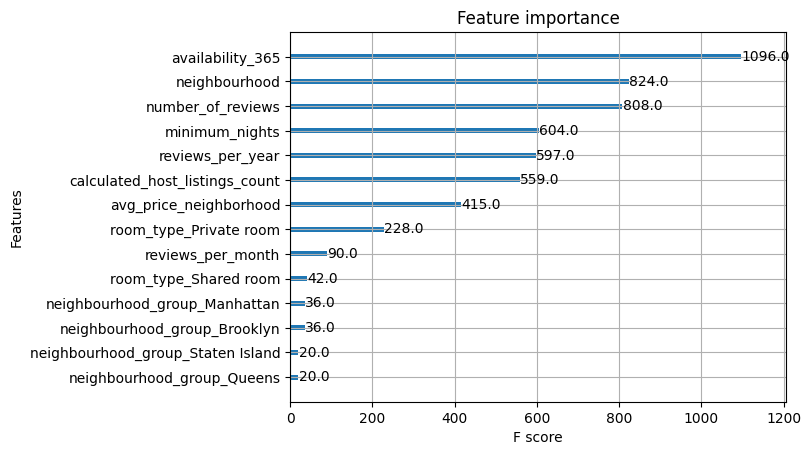

In [ ]:
#importing R2
from sklearn.metrics import r2_score
##seeing the improtance
from xgboost import plot_importance
import matplotlib.pyplot as plt # make sure to import pyplot

# Assuming you want to use the xgb_model defined previously
# If not, define and initialize your model here
model = xgb_model

model.fit(x_train_encoded, y_train)

plot_importance(model)
plt.show()

## **Recap: Initial Model Development**

A baseline **XGBoost model** was developed to predict `price` using the preprocessed and feature-engineered dataset.

---

### **1. Data Splitting**
- **Target Variable**: `price`
- **Feature Variables**: All columns except `price`
- Used a **70/30 train-test split** to ensure sufficient data for both training and testing.

---

### **2. Encoding Categorical Variables**
- **TargetEncoder**: Applied to `neighbourhood` to handle high cardinality.
- **One-Hot Encoding**: Used for `neighbourhood_group` and `room_type` to ensure compatibility with XGBoost.

---

### **3. Building the Baseline XGBoost Model**
- Initial hyperparameters:
  - `eta` (learning rate): **0.3**, `max_depth`: **6**, `min_child_weight`: **1**
  - `gamma`: **0**, `subsample`: **1**, `colsample_bytree`: **1**, `n_estimators`: **100**
- The model was trained on the encoded training set.

---

### **4. Model Evaluation**
- **R² Score**:
  - **Training Set**: 0.65
  - **Test Set**: 0.56
- **Insights**:
  - The model explains about **56%** of the variance in the test data.
  - A small gap between training and test R² scores indicates reasonable generalisation.

---

### **5. Feature Importance**
- Top predictors:
  - `availability_365`, `minimum_nights`, and `calculated_host_listings_count`
- Categorical features (`neighbourhood_group`, `room_type`) were less impactful compared to numerical features.

---

### **Outcome**
The baseline XGBoost model is a strong starting point with promising performance. However, improvements can be made through hyperparameter tuning, advanced feature engineering, and exploring alternative models.

---

### **Next Steps**
1. Optimise hyperparameters using Grid Search or Bayesian Optimisation.
2. Experiment with additional features or transformations to enhance predictive power.


# Iterative feature engineering

In [ ]:
# Categorizing availability_365 into bins ( I split 365 by 365 / 3)
def categorize_availability(value):
    if value <= 120:
        return "Low Availability"
    elif 121 <= value <= 242:
        return "Medium Availability"
    else:
        return "High Availability"

# Apply the function to the training and testing sets
x_train_encoded['availability_category'] = x_train_encoded['availability_365'].apply(categorize_availability)
x_test_encoded['availability_category'] = x_test_encoded['availability_365'].apply(categorize_availability)

# Preview the new feature
print("Training set availability categories:")
print(x_train_encoded[['availability_365', 'availability_category']].head())

print("\nTesting set availability categories:")
print(x_test_encoded[['availability_365', 'availability_category']].head())


Training set availability categories:
       availability_365 availability_category
36162                89      Low Availability
6297                  0      Low Availability
41263               303     High Availability
21105               145   Medium Availability
18127                 0      Low Availability

Testing set availability categories:
       availability_365 availability_category
37542               342     High Availability
13974                 0      Low Availability
22542                 0      Low Availability
24677                73      Low Availability
37006               280     High Availability


In [ ]:
# Log transformation for minimum_nights
x_train_encoded['log_minimum_nights'] = np.log1p(x_train_encoded['minimum_nights'])  # log(1 + x)
x_test_encoded['log_minimum_nights'] = np.log1p(x_test_encoded['minimum_nights'])

# Check the transformed feature
print(x_train_encoded['log_minimum_nights'].describe())


count    32510.000000
mean         1.499055
std          0.867780
min          0.693147
25%          0.693147
50%          1.098612
75%          1.791759
max          7.131699
Name: log_minimum_nights, dtype: float64


In [ ]:
# Categorise minimum_nights (I checked what consituted as short term stay in NYC and used those guidelines)
def categorise_minimum_nights(value):
    if value <= 30:
        return "Short-Term Stay"
    elif 31 <= value <= 90:
        return "Mid-Term Stay"
    else:
        return "Long-Term Stay"

# Apply to training and testing sets
x_train_encoded['stay_category'] = x_train_encoded['minimum_nights'].apply(categorise_minimum_nights)
x_test_encoded['stay_category'] = x_test_encoded['minimum_nights'].apply(categorise_minimum_nights)


# Check the new feature
print(x_train_encoded.head())


       neighbourhood  minimum_nights  number_of_reviews  reviews_per_month  \
36162            133               1                  0                  0   
6297             169              30                  2                  0   
41263            186               2                  3                  1   
21105             97               7                 35                  1   
18127             81               1                  5                  0   

       calculated_host_listings_count  availability_365  \
36162                               1                89   
6297                                1                 0   
41263                             327               303   
21105                               5               145   
18127                               1                 0   

       avg_price_neighborhood  reviews_per_year  neighbourhood_group_Brooklyn  \
36162                     140                 0                             1   
6297          

In [ ]:
# One-hot encode the new categorical feature
x_train_encoded = pd.get_dummies(x_train_encoded, columns=['stay_category'], drop_first=True)
x_test_encoded = pd.get_dummies(x_test_encoded, columns=['stay_category'], drop_first=True)

x_train_encoded = pd.get_dummies(x_train_encoded, columns=['availability_category'], drop_first=True)
x_test_encoded = pd.get_dummies(x_test_encoded, columns=['availability_category'], drop_first=True)

# Check the new feature
print(x_train_encoded.head())

       neighbourhood  minimum_nights  number_of_reviews  reviews_per_month  \
36162            133               1                  0                  0   
6297             169              30                  2                  0   
41263            186               2                  3                  1   
21105             97               7                 35                  1   
18127             81               1                  5                  0   

       calculated_host_listings_count  availability_365  \
36162                               1                89   
6297                                1                 0   
41263                             327               303   
21105                               5               145   
18127                               1                 0   

       avg_price_neighborhood  reviews_per_year  neighbourhood_group_Brooklyn  \
36162                     140                 0                             1   
6297          

In [ ]:
#just to convert boolean value to int
x_train_encoded = x_train_encoded.astype(int)
x_test_encoded = x_test_encoded.astype(int)

# Check the new feature
print(x_train_encoded.head())

       neighbourhood  minimum_nights  number_of_reviews  reviews_per_month  \
36162            133               1                  0                  0   
6297             169              30                  2                  0   
41263            186               2                  3                  1   
21105             97               7                 35                  1   
18127             81               1                  5                  0   

       calculated_host_listings_count  availability_365  \
36162                               1                89   
6297                                1                 0   
41263                             327               303   
21105                               5               145   
18127                               1                 0   

       avg_price_neighborhood  reviews_per_year  neighbourhood_group_Brooklyn  \
36162                     140                 0                             1   
6297          

In [ ]:
# Apply log transformation (adding 1 to avoid log(0) issues)
x_train_encoded['log_availability_365'] = np.log1p(x_train_encoded['availability_365'])
x_test_encoded['log_availability_365'] = np.log1p(x_test_encoded['availability_365'])


In [ ]:
#Creating bins for host listings
def categorize_host_listings(value):
    if value <= 5:
        return "Small operation"
    elif 6 <= value <= 50:
        return "Medium Operation"
    else:
        return "Large Operation"

x_train_encoded['host_category'] = x_train_encoded['calculated_host_listings_count'].apply(categorize_host_listings)
x_test_encoded['host_category'] = x_test_encoded['calculated_host_listings_count'].apply(categorize_host_listings)


In [ ]:
#dummies for host_category
x_train_encoded = pd.get_dummies(x_train_encoded, columns=['host_category'], drop_first=True)
x_test_encoded = pd.get_dummies(x_test_encoded, columns=['host_category'], drop_first=True)

#just to convert boolean value to int
x_train_encoded = x_train_encoded.astype(int)
x_test_encoded = x_test_encoded.astype(int)

# Check the new feature
print(x_train_encoded.head())

       neighbourhood  minimum_nights  number_of_reviews  reviews_per_month  \
36162            133               1                  0                  0   
6297             169              30                  2                  0   
41263            186               2                  3                  1   
21105             97               7                 35                  1   
18127             81               1                  5                  0   

       calculated_host_listings_count  availability_365  \
36162                               1                89   
6297                                1                 0   
41263                             327               303   
21105                               5               145   
18127                               1                 0   

       avg_price_neighborhood  reviews_per_year  neighbourhood_group_Brooklyn  \
36162                     140                 0                             1   
6297          

In [ ]:
# Creating interaction feature: room_type_availability
# Combining `room_type` and `availability_category`
# Get one-hot encoded column names for room_type and availability_category
room_type_cols = [col for col in x_train_encoded.columns if col.startswith('room_type_')]
availability_cat_cols = [col for col in x_train_encoded.columns if col.startswith('availability_category_')]


# Create interaction features by multiplying the relevant one-hot encoded columns
for room_type_col in room_type_cols:
    for availability_cat_col in availability_cat_cols:
        interaction_col_name = room_type_col + '_' + availability_cat_col
        x_train_encoded[interaction_col_name] = x_train_encoded[room_type_col] * x_train_encoded[availability_cat_col]
        x_test_encoded[interaction_col_name] = x_test_encoded[room_type_col] * x_test_encoded[availability_cat_col]

# Preview the new features in the training set
print(x_train_encoded[[c for c in x_train_encoded.columns if 'room_type_' in c and 'availability_category_' in c]].head())

       room_type_Private room_availability_category_Low Availability  \
36162                                                  1               
6297                                                   0               
41263                                                  0               
21105                                                  0               
18127                                                  1               

       room_type_Private room_availability_category_Medium Availability  \
36162                                                  0                  
6297                                                   0                  
41263                                                  0                  
21105                                                  1                  
18127                                                  0                  

       room_type_Shared room_availability_category_Low Availability  \
36162                                        

In [ ]:
# Check the new feature
print(x_train_encoded.head())

       neighbourhood  minimum_nights  number_of_reviews  reviews_per_month  \
36162            133               1                  0                  0   
6297             169              30                  2                  0   
41263            186               2                  3                  1   
21105             97               7                 35                  1   
18127             81               1                  5                  0   

       calculated_host_listings_count  availability_365  \
36162                               1                89   
6297                                1                 0   
41263                             327               303   
21105                               5               145   
18127                               1                 0   

       avg_price_neighborhood  reviews_per_year  neighbourhood_group_Brooklyn  \
36162                     140                 0                             1   
6297          

## Hyper parameter tuning

In [ ]:
pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.0 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from xgboost import XGBRegressor

# Define the search space
search_space = {
    'eta': (0.01, 0.5, 'uniform'),
    'max_depth': (3, 9),
    'min_child_weight': (1, 5),
    'gamma': (0, 1),
    'subsample': (0.6, 0.9),
    'colsample_bytree': (0.6, 0.9),
    'n_estimators': (100, 500)
}

# Initialise the model
xgb_model = XGBRegressor()

# Setup Bayesian Optimisation
bayes_search = BayesSearchCV(xgb_model, search_space, n_iter=50, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)

# Fit the model
bayes_search.fit(x_train_encoded, y_train)

# Best parameters found by Bayesian optimisation
print("Best hyperparameters:", bayes_search.best_params_)

# Best score (negative MSE)
print("Best score:", bayes_search.best_score_)


Best hyperparameters: OrderedDict([('colsample_bytree', 0.6), ('eta', 0.022020116508335012), ('gamma', 1), ('max_depth', 7), ('min_child_weight', 5), ('n_estimators', 470), ('subsample', 0.9)])
Best score: -2256.0610691508177


In [ ]:
from skopt import BayesSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Define the optimized model parameters from Bayesian optimisation
best_params = {
    'colsample_bytree': 0.6,
    'eta': 0.0222,
    'gamma': 1,
    'max_depth': 7,
    'min_child_weight': 5,
    'n_estimators': 470,
    'subsample': 0.9
}

# Create the model using the best hyperparameters
final_model = XGBRegressor(**best_params)

# Fit the model to the training data
final_model.fit(x_train_encoded, y_train)

# Make predictions on both the training and test sets
y_train_pred = final_model.predict(x_train_encoded)
y_test_pred = final_model.predict(x_test_encoded)

# Calculate R² for the training set
r2_train = r2_score(y_train, y_train_pred)
print(f"R² on Training Set: {r2_train}")

# Calculate R² for the test set
r2_test = r2_score(y_test, y_test_pred)
print(f"R² on Test Set: {r2_test}")


R² on Training Set: 0.6299992799758911
R² on Test Set: 0.5703379511833191


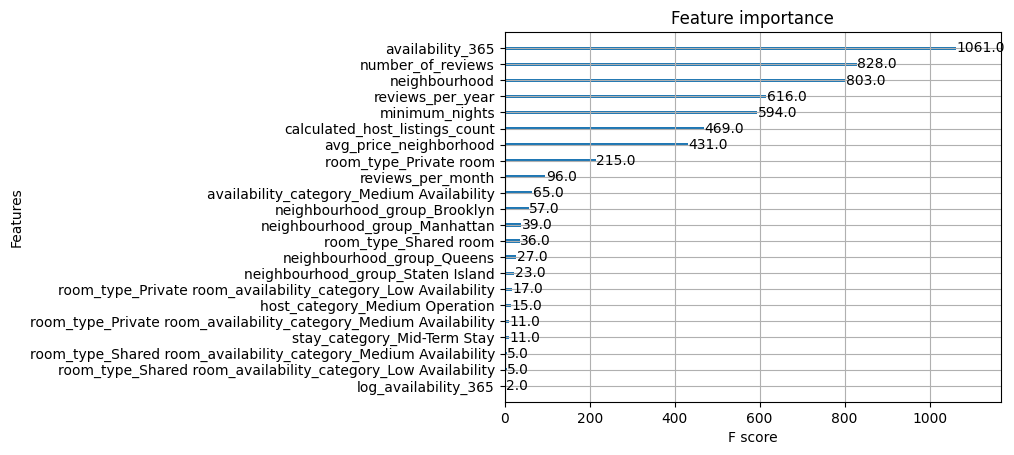

In [ ]:
#importing R2
from sklearn.metrics import r2_score
##seeing the improtance
from xgboost import plot_importance
import matplotlib.pyplot as plt # make sure to import pyplot

# Assuming you want to use the xgb_model defined previously
# If not, define and initialise your model here
model = xgb_model

model.fit(x_train_encoded, y_train)

plot_importance(model)
plt.show()

# **Recap: Iterative Feature Engineering and Hyperparameter Tuning**

---

## **Objective**
To predict Airbnb prices by engineering meaningful features, optimising model hyperparameters, and improving the model's ability to generalise.

---

## **Key Steps Taken**
1. **Feature Engineering**:
   - Categorised availability (`availability_category`) and stay duration (`stay_category`) into actionable groups.
   - Created interaction features such as `room_type_availability` and contextual features like `avg_price_neighbourhood`.
   - Log-transformed `minimum_nights` to reduce skewness and improve interpretability.

2. **Hyperparameter Tuning**:
   - Used Bayesian optimisation to fine-tune XGBoost parameters, achieving optimal settings that improved both training and test performance.

---

## **Results**
- **Model Performance**:
  - **R² on Training Set**: 0.63  
  - **R² on Test Set**: 0.57  
  - The model demonstrates strong generalisation with minimal overfitting.

- **Feature Importance**:
  - Top predictors: `availability_365`, `number_of_reviews`, and `neighbourhood`.
  - Engineered features, such as `room_type_availability`, added significant predictive value.

---

## **Next Steps**
1. Experiment with alternative models, such as LightGBM or Random Forest, to compare performance.
2. Incorporate external data (e.g., socioeconomic factors or property amenities) to further enhance predictions.

---



# Conclusion

This project aimed to predict Airbnb listing prices using machine learning and feature engineering. The final model achieved an **R² score of 0.57**, explaining 57% of the variability in prices. Key findings include:

## Key Drivers of Pricing
1. **Availability**:
   - Year-round availability is a significant factor in predicting price, though its relationship with price is non-linear.
   - **Actionable Insight**: Hosts should optimise availability during high-demand periods and use dynamic pricing to maximise revenue.

2. **Reviews**:
   - The number of reviews and review frequency strongly influence pricing by enhancing guest trust and satisfaction.
   - **Actionable Insight**: Encouraging guest reviews can improve listing visibility and support higher pricing.

3. **Neighbourhood**:
   - Location plays a critical role in pricing, with specific neighbourhoods commanding higher average prices.
   - **Actionable Insight**: Hosts should highlight unique neighbourhood features in their listings to stand out and justify premium prices.

## Challenges and Opportunities
1. **Outliers**:
   - Extreme prices skew predictions and impact model performance.
   - **Actionable Insight**: Treating or capping outliers can help improve the model's robustness and accuracy.

2. **Uncaptured Variables**:
   - Factors like seasonality, proximity to landmarks, and local events may explain some of the variance not captured by the model.
   - **Actionable Insight**: Enriching the dataset with external features could enhance model performance and insights.

## Recommendations for Hosts
1. **Dynamic Pricing**:
   - Adjust prices based on demand patterns and market trends to stay competitive.
2. **Focus on Reviews**:
   - Offer excellent guest experiences to encourage reviews and boost listing credibility.
3. **Leverage Neighbourhood Strengths**:
   - Emphasise proximity to attractions and other neighbourhood highlights to attract bookings and justify pricing.

---
